In [1]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

In [2]:
# Генерируем уникальный seed
my_code = "Игнатьева"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [3]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [4]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [6]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [7]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [8]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [9]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [10]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.436364,0.475728,0.483636,0.537162,0.849276,0.770044,Bream
1,0.545455,0.563107,0.556364,0.550676,0.545806,0.984362,Perch
2,0.666667,0.61165,0.610909,0.60473,0.642425,0.888916,Perch
3,0.007394,0.08932,0.083636,0.084459,0.031258,0.031795,Smelt
4,0.181818,0.469903,0.465455,0.489865,0.230512,0.475001,Pike
...,...,...,...,...,...,...,...
90,0.121212,0.266019,0.265455,0.287162,0.499878,0.399499,Parkki
91,0.047273,0.194175,0.189091,0.209459,0.222834,0.283559,Roach
92,0.181818,0.530097,0.525455,0.523649,0.264232,0.453896,Pike
93,0.415152,0.514563,0.510909,0.510135,0.530961,0.888244,Perch


In [11]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [12]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Length1', 'Length3', 'Weight']
Height


In [13]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [14]:
x_train

,Length1,Length3,Weight
0,0.475728,0.537162,0.436364
1,0.563107,0.550676,0.545455
2,0.61165,0.60473,0.666667
3,0.08932,0.084459,0.007394
4,0.469903,0.489865,0.181818
...,...,...,...
90,0.266019,0.287162,0.121212
91,0.194175,0.209459,0.047273
92,0.530097,0.523649,0.181818
93,0.514563,0.510135,0.415152


In [15]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
r_model1 = DecisionTreeRegressor(criterion='mse')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse')
r_model3 = DecisionTreeRegressor(criterion='mae')
r_model4 = DecisionTreeRegressor(criterion="poisson") 


In [16]:
r_model1.fit(x_train,y_train)
a=r_model1.predict(x_test)
mse1 = mean_squared_error(y_test, a)
mse1

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.005463663906646484

In [17]:
r_model2.fit(x_train,y_train)
a=r_model2.predict(x_test)
mse1 = mean_squared_error(y_test, a)
mse1

0.004436031203119512

In [18]:
r_model3.fit(x_train,y_train)
a=r_model3.predict(x_test)
mse1 = mean_squared_error(y_test, a)
mse1

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


0.005710103244013286

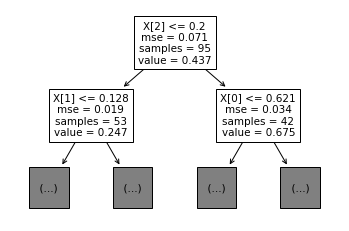

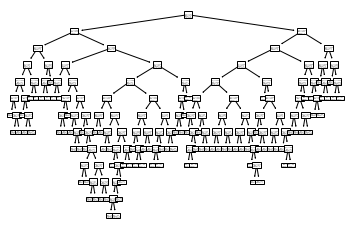

In [19]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(r_model1, max_depth=1)
plt.show()
plot_tree(r_model1)
plt.show()

In [20]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [21]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Length1', 'Length3']
Species


In [22]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [23]:
y_train

0      Bream
1      Perch
2      Perch
3      Smelt
4       Pike
       ...  
90    Parkki
91     Roach
92      Pike
93     Perch
94      Pike
Name: Species, Length: 95, dtype: object

In [24]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
c_model1 = DecisionTreeClassifier(ccp_alpha=0.0, criterion='gini', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')
c_model2 = DecisionTreeClassifier(ccp_alpha=0.0, criterion='entropy', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')
c_model3 = DecisionTreeClassifier(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')
c_model4 = DecisionTreeClassifier(ccp_alpha=0.0, criterion='poisson', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='random')

In [25]:
c_model1.fit(x_train,y_train)
c_model1.predict(x_test)

array(['Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Perch', 'Bream',
       'Perch', 'Perch', 'Bream', 'Bream', 'Bream', 'Bream', 'Perch',
       'Perch', 'Bream', 'Perch', 'Perch', 'Bream', 'Perch', 'Perch',
       'Bream', 'Bream', 'Bream', 'Perch', 'Bream', 'Perch', 'Perch',
       'Perch', 'Bream', 'Perch', 'Bream'], dtype=object)

In [26]:
c_model2.fit(x_train,y_train)
c_model2.predict(x_test)

array(['Perch', 'Perch', 'Smelt', 'Bream', 'Perch', 'Perch', 'Bream',
       'Smelt', 'Perch', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch',
       'Perch', 'Bream', 'Perch', 'Perch', 'Bream', 'Smelt', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Bream'], dtype=object)

In [27]:
c_model3.fit(x_train,y_train,)
c_model3.predict(x_test)

KeyError: 'mae'

In [28]:
c_model4.fit(x_train,y_train)
c_model4.predict(x_test)

TypeError: '<' not supported between instances of 'str' and 'int'

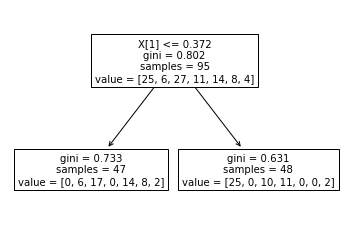

In [29]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(c_model1, max_depth=1)
plt.show()

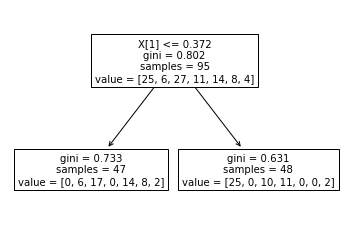

In [30]:
plot_tree(c_model1)
plt.show()